## Support Vector Classfier

In [1]:
from sklearn import datasets 
import numpy as np 

iris = datasets.load_iris() 
X = iris.data[:,[2,3]] 
y = iris.target

In [2]:
print('Class labels:', np.unique(y)) 

Class labels: [0 1 2]


# Split the Datasets

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y) 

In [4]:
print('Labels Counts in y:', np.bincount(y)) 
print('Labels counts in y_train', np.bincount(y_train)) 
print('Labels counts in y_tests:', np.bincount(y_test)) 

Labels Counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_tests: [15 15 15]


## Preprocessing the data 

In [5]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 
sc.fit(X_train) 
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test) 

# SVM

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 颜色映射
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightblue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 画决策边界
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 画样本点
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # 标出测试样本
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolors='black',
                    alpha=1.0, linewidth=1, marker='o',
                    s=100, label='test set')


In [7]:
# kernel = linear 线性分割，poly 多项式核，rbf 非线性
from sklearn.svm import SVC 
svm =SVC(kernel='linear',random_state=1,C=1.0) 
svm.fit(X_train_std, y_train) 
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

C:\Users\28718\AppData\Local\Temp\ipykernel_60800\1491462234.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


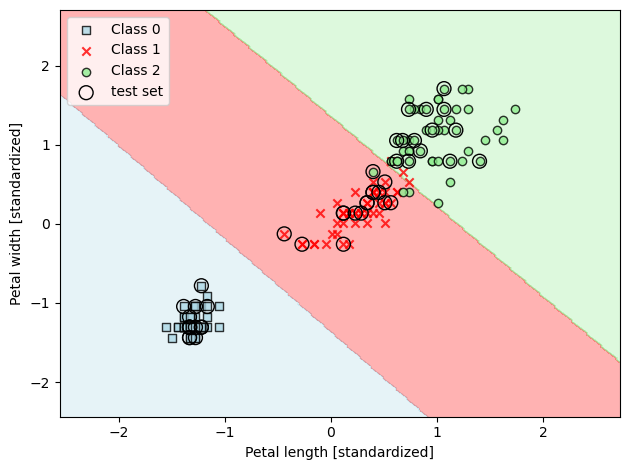

In [8]:
plot_decision_regions(X_combined_std,
                      y_combined, 
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## SGDClassfier

In [9]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

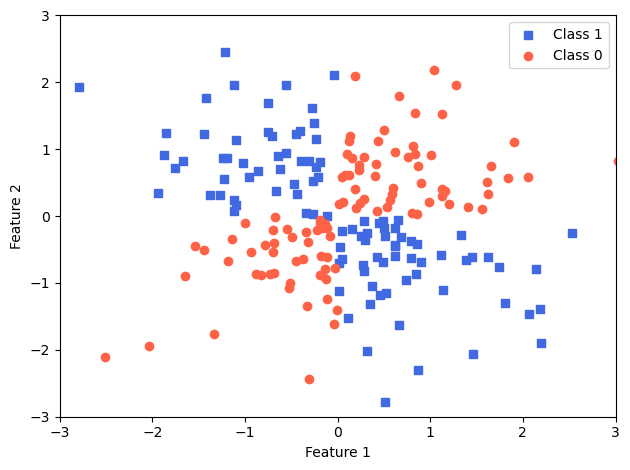

In [10]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
X_xor[y_xor == 1, 1],
    c='royalblue', marker='s',
    label='Class 1') 

plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


C:\Users\28718\AppData\Local\Temp\ipykernel_60800\1491462234.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


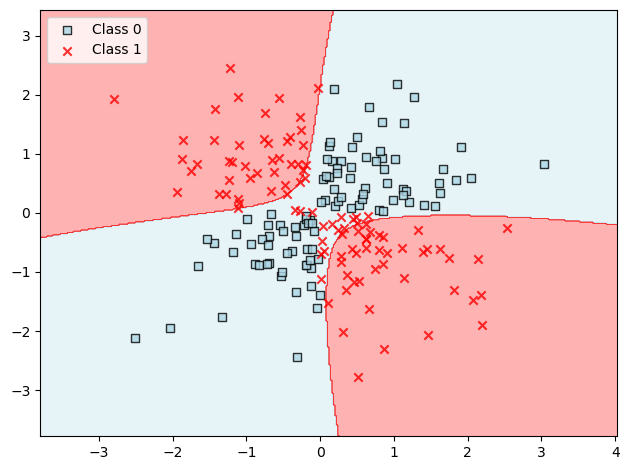

In [11]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.show()

The 𝛾 parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. <br>
If we increase the value for 𝛾𝛾, we increase the influence or reach of the training examples, <br>
which leads to a tighter and bumpier decision boundary.<br>

C:\Users\28718\AppData\Local\Temp\ipykernel_60800\1491462234.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


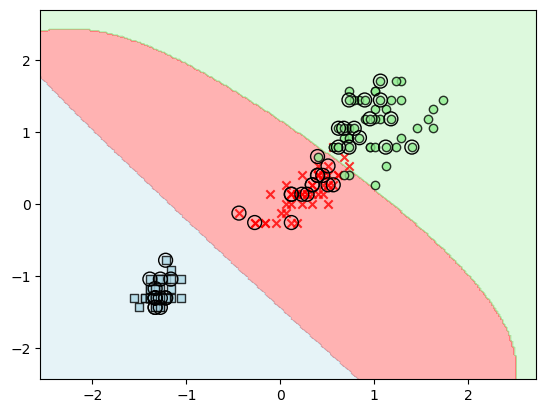

In [12]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))


C:\Users\28718\AppData\Local\Temp\ipykernel_60800\1491462234.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


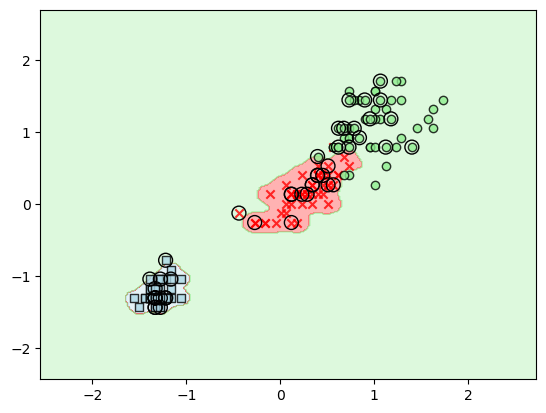

In [13]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
